In [212]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import folium

In [19]:
data = pd.read_csv('data/schools.csv')
data.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


In [20]:
data = data[['School ID', 'School Name', 'Mapped Location']]
data.head()

,School ID,School Name,Mapped Location
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)"
4,110,Antioch High School,"(36.04667464, -86.59941833)"


In [21]:
df = data.rename(columns={'School ID':'StopID', 'School Name':'StopName', 'Mapped Location':'Location'})
df.head()

,StopID,StopName,Location
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)"
4,110,Antioch High School,"(36.04667464, -86.59941833)"


### Extracting longitude and latitude

In [27]:
c=0
for loc in df.Location:
    loc = ast.literal_eval(str(loc))
    c+=1
    if c==10:
        break
    print(type(loc), loc)

<class 'tuple'> (36.02181712, -86.65884778)
<class 'tuple'> (36.2529607, -86.8322292)
<class 'tuple'> (36.27376585, -86.70383153)
<class 'tuple'> (36.23158465, -86.62377469)
<class 'tuple'> (36.04667464, -86.59941833)
<class 'tuple'> (36.05537897, -86.67182989)
<class 'tuple'> (36.06687798, -86.66406971)
<class 'tuple'> (36.07074879, -86.93482036)
<class 'tuple'> (36.26968766, -86.76230026)


In [25]:
# extract latitude to a new column: lat
df['lat'] = [ast.literal_eval(str(loc))[0] for loc in df.Location]

# extract longitude to a new column: lng
df['lng'] = [ast.literal_eval(str(loc))[1] for loc in df.Location]

# print the first few rows of df again
df.head()

,StopID,StopName,Location,lat,lng
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)",36.021817,-86.658848
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)",36.252961,-86.832229
2,105,Amqui Elementary,"(36.27376585, -86.70383153)",36.273766,-86.703832
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)",36.231585,-86.623775
4,110,Antioch High School,"(36.04667464, -86.59941833)",36.046675,-86.599418


### Plotting chicken locations
- create a scatterplot that shows where the Nashville chickens are!

In [29]:
chickens = pd.read_csv('data/Domesticated_Hen_Permits_clean_adjusted_lat_lng.csv')
chickens.head()

,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029132,-86.724578
1,1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069132,-86.754578
2,2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236134,-86.711204
3,3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246134,-86.751204
4,4,200.0,Nashville,TN,37221,22.0,12/10/2014,36.029367,-86.935290


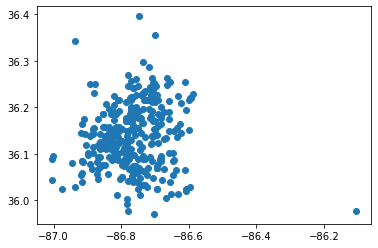

In [30]:
# Plot the locations of all Nashville chicken permits
plt.scatter(x = chickens.lng, y = chickens.lat)

- We can see the relative location of the Nashville chickens using longitude for the x-axis and latitude for the y-axis. 

### Creating a GeoDataFrame & examining the geometry

In [ ]:
# Import geopandas
import geopandas as gpd 
import matplotlib.pyplot as plt

# Read in the services district shapefile and look at the first few rows.
service_district = gpd.read_file(shapefile_path)
print(service_district.head())

# Print the contents of the service districts geometry in the first row
print(service_district.loc[0, 'geometry'])

- The geometry field holds a series of latitude/longitude pairs that define the border of a polygon. Printing a geometry field gives all of the latitude/longitude pairs that make up the polygon boundary.

### Plotting shapefile polygons
- The next step is to show the map of polygons.

In [ ]:
# Plot the Service Districts without any additional arguments
service_district.plot()
plt.show()

# Plot the Service Districts, color them according to name, and show a legend
service_district.plot(column = 'name', legend = True)
plt.show()

### Plotting points over polygons

In [ ]:
# Plot the service district shapefile
service_district.plot(column="name")

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c = 'black')

# Show the plot
plt.show()

In [ ]:
# Plot the service district shapefile
service_district.plot(column='name', legend=True)

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c='black', edgecolor = 'white')


# Add labels and title
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()
plt.show()

### Colormaps
- When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice. 
- compare a qualitative colormap to a sequential (quantitative) colormap using the school districts GeoDataFrame. 

In [33]:
import geopandas as gpd 
import matplotlib.pyplot as plt

school_districts = gpd.read_file('data/school_districts.json')
school_districts.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


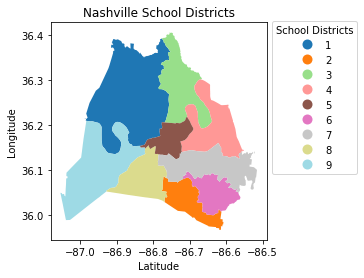

In [35]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

- Plot `school_districts` with the sequential `summer` colormap. Keep the other arguments as they are.

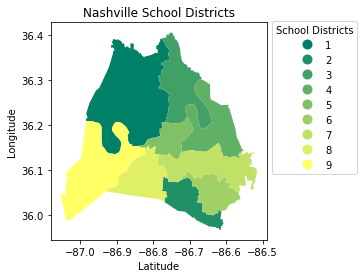

In [36]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
school_districts.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

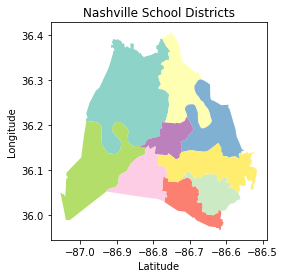

In [37]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
school_districts.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

- There is no legend when the `column` argument is not supplied even if we set legend to True!

### Map Nashville neighborhoods

In [154]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('./data/neighborhoods.json') 

# Print the first few rows of neighborhoods
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


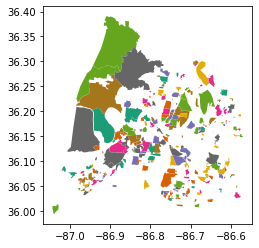

In [155]:
# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

- That's a lot of neighborhoods! How will we find one to stroll through and look at public art?

#### Changing coordinate reference systems
- find a GeoDataFrame's coordinate reference system and change it. 

In [40]:
# Print the first row of school districts GeoDataFrame and the crs
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


In [42]:
print(school_districts.crs)

epsg:4326


In [44]:
# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-9659344.056 4353528.767, -965..."


In [45]:
print(school_districts.crs)

epsg:3857


- We can change the **coordinate reference system** of a GeoDataFrame by changing the `crs property` of the GeoDataFrame. 
- Notice that the units for geometry change when we change the CRS. We always need to ensure two GeoDataFrames share the same crs before we spatially join them.

#### Construct a GeoDataFrame from a DataFrame
-  construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. We will need to import the **Point** constructor from the `shapely.geometry` module to create a geometry column in art before we can create a GeoDataFrame from art. 
- This will get us ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

In [121]:
art = pd.read_csv('data/public_art.csv')
art.head(1)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.8366,"(36.12856, -86.8366)"


In [122]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [147]:
from shapely.geometry import Point
df = art[['Longitude', 'Latitude']]

formula = lambda lng, lat: Point(float(lng), float(lat))

l = []
for ix, row in df.iterrows():
    l.append(formula(row['Longitude'], row['Latitude']))
    
art['geometry'] = l
# Create a geometry column from lng & lat
# art['geometry'] = df.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# # Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
print(type(art_geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


- Now that the public art data is in a GeoDataFrame we can join it to the neighborhoods with a special kind of join called a spatial join. 

### Spatial join
- Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)
- Write a spatial join to find the art in art_geo that intersects with neighborhoods
- write a spatial join to find the art in art_geo that is within neighborhoods
- write a spatial join to find the art locations in art_geo that contain neighborhoods

In [149]:
# Spatially join art_geo and neighborhoods 
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


In [150]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

(40, 13)


In [151]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


### Finding the neighborhood with the most public art
- Now that we have created art_geo, a GeoDataFrame, from the art DataFrame, we can join it spatially to the neighborhoods data to see what art is in each neighborhood.

In [157]:
# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = "within")

# Print the first few rows
neighborhood_art.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
21,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.16466,-86.78102,"(36.16466, -86.78102)",POINT (-86.78102 36.16466),41,Urban Residents
22,Children's Chairs For The Seasons,McGraw,Deloss,"615 Church Street, Nashville TN",Mixed Media - wood and paint,Furniture,chairs depicting the four seasons,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents
34,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents


- Now that we have successfully joined art and neighborhoods we can see the title and other information about the artwork along with the name of the neighborhood where it is located. 

### Aggregating points within polygons
- Now that we have spatially joined art and neighborhoods, we can group, aggregate, and sort the data to find which neighborhood has the most public art. We can count artwork titles to see how many artworks are in each neighborhood.

In [159]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'Title', ascending = False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


### Plotting the Urban Residents neighborhood and art
- Now we know that most art is in the Urban Residents neighborhood. In this exercise, we'll create a plot of art in that neighborhood. First we will subset just the urban_art from neighborhood_art and we'll subset the urban_polygon from neighborhoods. Then we will create a plot of the polygon as ax before adding a plot of the art.

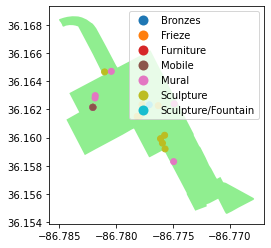

In [160]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True);
plt.show()

- The light green area shows the boundary of the Urban Residents neighborhood and the art locations are color coded by type of work.

### Find the area of the Urban Residents neighborhood


In [163]:
urban_polygon.head()

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


In [178]:
urban_poly_3857.geometry.area.values[0]/10**6

1.1289896057983793

In [181]:
# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area.values[0] / 10**6
print('The area of the Urban Residents neighborhood is ', area, ' km squared')

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
The area of the Urban Residents neighborhood is  1.1289896057983793  km squared


### The center of the Urban Residents neighborhood
- find the center point of the urban_poly_3857 and plot it over the polygon.

<class 'geopandas.geoseries.GeoSeries'>


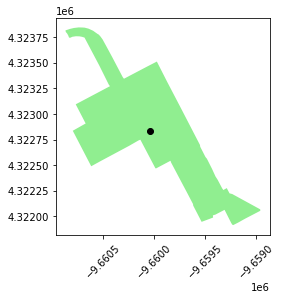

In [182]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

### Prepare to calculate distances
- prepare a GeoDataFrame called art_dist_meters with the locations of downtown art converted to meters using EPSG:3857

In [184]:
# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
art_dist_meters.head(2)



C:\Users\Shubham\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234)


In [185]:
# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
art_dist_meters.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-9666606.094 4318325.479)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-9660053.829 4322982.159)


In [ ]:
# Add a column to art_meters, center
art_dist_meters['center'] = center_point

## Create a folium location from the urban centroid
- In order to construct a folium map of the Urban Residents neighborhood, we need to build a coordinate pair location that is formatted for folium.

In [199]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.geometry.centroid

# Print urban_center
urban_center

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


41    POINT (-86.77756 36.16128)
dtype: geometry

In [209]:
# Create array for folium called urban_location
urban_location = [urban_center.y.values[0], urban_center.x.values[0]]

# Print urban_location
urban_location

[36.161278209287914, -86.77756457127047]

- Folium locations are arrays with latitude first. We just created a folium location from the center of the Urban Residents neighborhood.

### Create a folium map of downtown Nashville


In [213]:
# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

# Display the map
display(downtown_map)

### Folium street map of the downtown neighborhood
- create the folium map of downtown and add the Urban Residents neighborhood area from `urban_polygon`

In [215]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.centroid

folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
